### 1. Задаем нашу функцию и берем от неё производные первого и второго порядка.

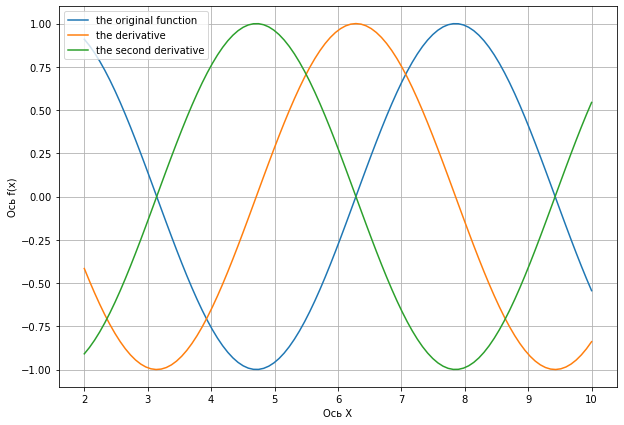

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import interpolate

y = lambda x: np.sin(x)                    # the original function
z = lambda x: np.cos(x)     # the derivative of the original function
v = lambda x: -np.sin(x)  # the second derivative of the original function

x = np.linspace(2, 10,100)
plt.rcParams['figure.figsize'] = [10, 7]             # change size picture {weight, height}
plt.plot(x, y(x), label="the original function")
plt.plot(x, z(x), label="the derivative")
plt.plot(x, v(x), label="the second derivative")
plt.xlabel('Ось X')
plt.ylabel('Ось f(x)')
plt.legend()
plt.grid()
plt.show()

### 2. Визуализируем производные посчитанные разными методами:
- $ f'=\frac{f(i+1)-f(i)}{h} $

- $ f'=\frac{f(i)-f(i-1)}{h} $

- $ f'=\frac{f(i+1)-f(i-1)}{2h} $

- $ f'=\frac{-3f(i)+4f(i+1)-2f(i+2)}{2h}$

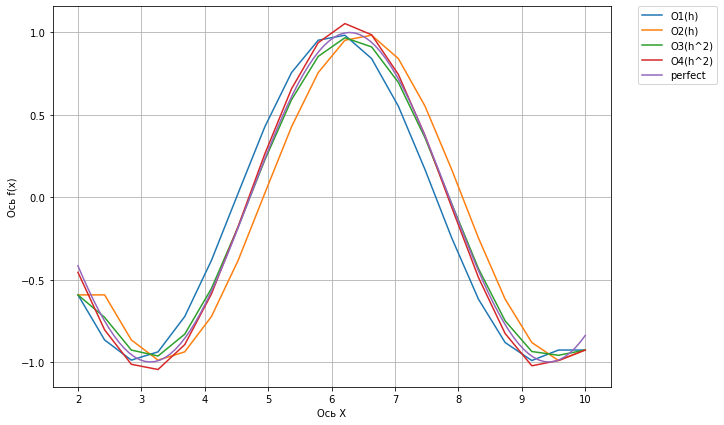

In [2]:
num = 20    # number of points
x1 = np.linspace(2, 10, num=num, endpoint=True, retstep=True, dtype=None)
h = x1[1]   # step net
array = x1[0]

der = y(array)
der1 = []
der2 = []
der3 = []
der4 = []

for i in range(num-1):
    der1.append((der[i+1]-der[i])/h)
for i in range(1,num):
    if i==1:
        der2.append(der1[0])
    der2.append((der[i]-der[i-1])/h)
for i in range(1,num-1):
    if i==1:
        der3.append(der1[0])
    der3.append((der[i+1]-der[i-1])/(2*h))
for i in range(0,num-2):
    der4.append((der[i+1]*2/h - der[i]*1.5/h - der[i+2]/(2*h)))

der4.append(der2[num-2])    #include
der4.append(der2[num-1])    #extreme
der1.append(der2[num-1])    #point
der3.append(der2[num-1])

der1 = np.array(der1)
der2 = np.array(der2)
der3 = np.array(der3)
der4 = np.array(der4)

plt.plot(array[0:num], der1,label="O1(h)")
plt.plot(array[0:num], der2, label="O2(h)")
plt.plot(array[0:num], der3, label="O3(h^2)")
plt.plot(array[0:num], der4, label="O4(h^2)")
plt.plot(x, z(x), label = "perfect")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid()
plt.xlabel('Ось X')
plt.ylabel('Ось f(x)')
plt.rcParams['figure.figsize'] = [15, 10]



### 3. Проверим первую формулу на погрешность (в теории наклон графика зависимости максимального отклонения от шага должен быт равен 1 )


Slope coefficient: 0.9987061121613119


Text(0, 0.5, 'log(max_error)')

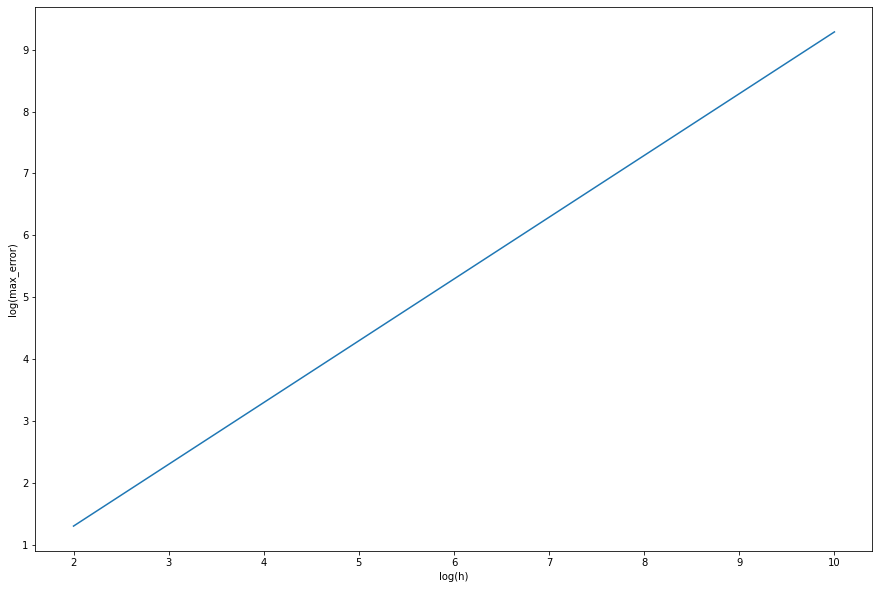

In [3]:
max_error = []
h2 = []
for i in range(10,1000):
    x1 = np.linspace(2, 10, num=i, endpoint=True, retstep=True, dtype=None)
    h1 = x1[1]
    h2.append(h1)


for i in range(10,1000):
    x1 = np.linspace(2, 10, num=i, endpoint=True, retstep=True, dtype=None)
    h = x1[1]
    array = x1[0]
    der = y(array)
    der1 = []
    der2 = []

    for j in range(i-1):
        der1.append((der[j+1]-der[j])/h)
    for k in range(1,i):
        if k==1:
            der2.append(der1[0])
        der2.append((der[k]-der[k-1])/h)

    der1.append(der2[i-1])                         # include extreme point
    der1 = np.array(der1)
    max_error.append(max(abs(z(x1[0])-der1)))      # max error 

max_error = np.log(max_error)
h2 = np.log(h2)
max_error = np.array(max_error)
h2 = np.array(h2)
a,b = np.polyfit(h2, max_error, 1)                 # approximation

approx = lambda x: a*x + b
x = np.linspace(2, 10)
approx = approx(x)
plt.plot(x, approx)
print('\033[1m' + 'Slope coefficient:', (approx[10]-approx[0])/(x[10]-x[0]))
plt.xlabel('log(h)')
plt.ylabel('log(max_error)')


### Как можно заметить, результат согласуется с теорией

### 4. Проведем аналогичные действия с 4ой формулой  (в теории угол наклона должен быть равен 2)

Slope coefficient: 1.9977767076710073


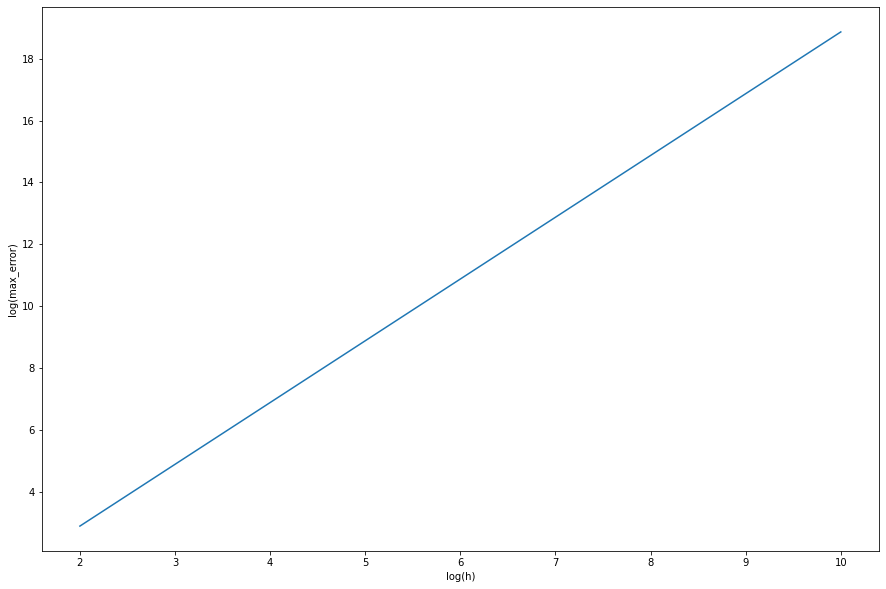

In [4]:
max_error = []
h2 = []
for i in range(10,1000):
    x1 = np.linspace(2, 10, num=i, endpoint=True, retstep=True, dtype=None)
    h1 = x1[1]
    h2.append(h1)
    
for i in range(10,1000):
    x1 = np.linspace(2, 10, num=i, endpoint=True, retstep=True, dtype=None)
    h = x1[1]
    array = x1[0]
    der = y(array)
    der4 = []
    for j in range(i-2):
        der4.append((der[j+1]*2/h - der[j]*1.5/h - der[j+2]*1/(2*h)))
    der4 = np.array(der4)
    max_error.append(max(abs(z(x1[0][0:i-2])-der4)))

max_error = np.log(max_error)
h2 = np.log(h2)
max_error = np.array(max_error)
h2 = np.array(h2)
a,b = np.polyfit(h2, max_error, 1)                 # approximation

approx = lambda x: a*x + b
x = np.linspace(2, 10)
approx = approx(x)
plt.plot(x, approx)
print('\033[1m' + 'Slope coefficient:', (approx[10]-approx[0])/(x[10]-x[0]))
plt.xlabel('log(h)')
plt.ylabel('log(max_error)')
plt.show()

### Снова результат согласуется с теорией



### 5. Проведем аналогичные действия со второй производной 
### Для построения графика 2ой производной воспользуемся формулой:
### - $ f''=\frac{f(i-1)-2f(i)+f(i+1)}{h^2}$

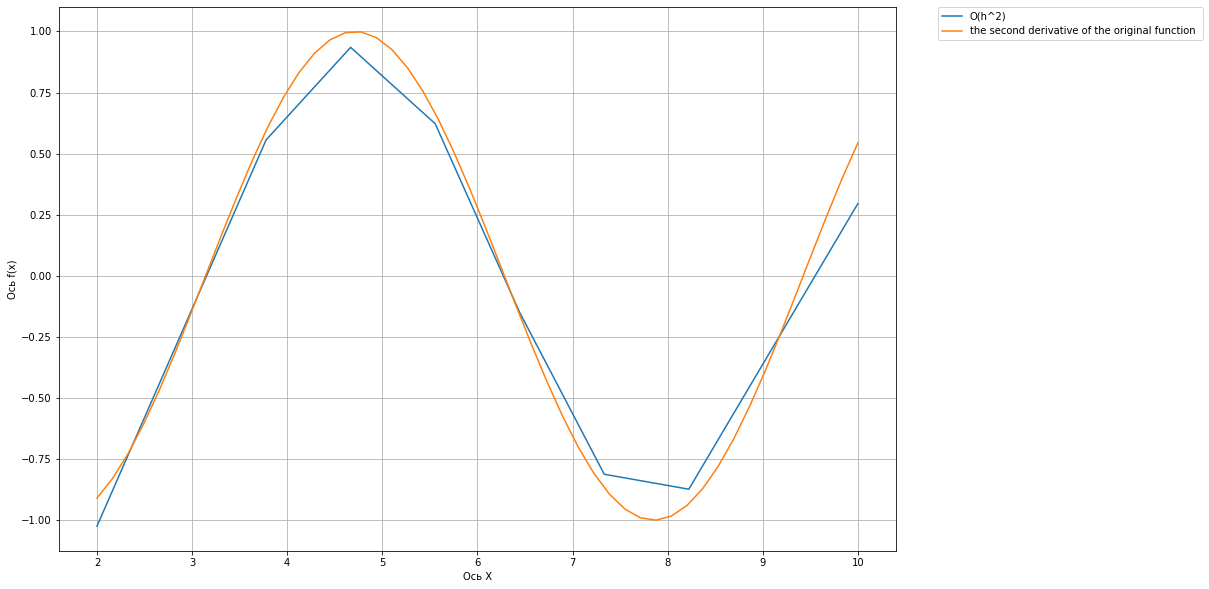

In [10]:
num = 10    # number of points
x1 = np.linspace(2, 10, num=num, endpoint=True, retstep=True, dtype=None)
h = x1[1]   # step net
array = x1[0]
der = y(array)
der21 = []

der21.append((2*der[0] - 5*der[1] + 4*der[2] - der[3])/(h**2)) # first element
for i in range(1,num-1):
    der21.append((der[i-1]+der[i+1]-2*der[i])/(h**2))
der21.append((2*der[9] - 5*der[8] + 4*der[7] - der[6])/(h**2)) # last element

der21 = np.array(der21)


plt.plot(array[0:num], der21,label="O(h^2)")

plt.plot(x, v(x), label = "the second derivative of the original function ")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid()
plt.xlabel('Ось X')
plt.ylabel('Ось f(x)')
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()


Slope coefficient: 1.938532341148337


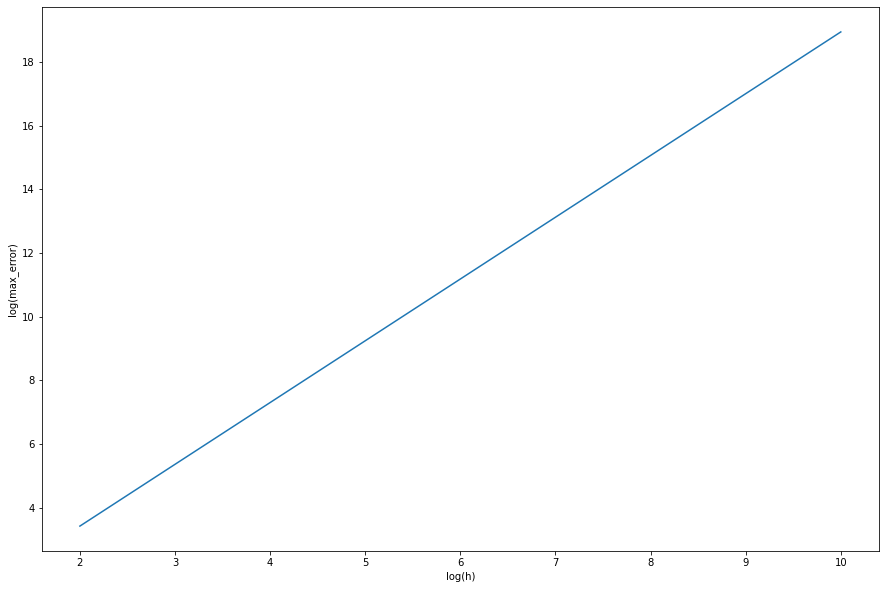

In [13]:
max_error = []
h2 = []
for i in range(10,1000):
    x1 = np.linspace(2, 10, num=i, endpoint=True, retstep=True, dtype=None)
    h1 = x1[1]
    h2.append(h1)
    
for i in range(10,1000):
    x1 = np.linspace(2, 10, num=i, endpoint=True, retstep=True, dtype=None)
    h = x1[1]
    array = x1[0]
    der = y(array)
    der21 = []
    der21.append((2*der[0] - 5*der[1] + 4*der[2] - der[3])/(h**2)) # first element
    for j in range(1, i-1):
        der21.append((der[j-1]+der[j+1]-2*der[j])/(h**2))
    der21.append((2*der[i-1] - 5*der[i-2] + 4*der[i-3] - der[i-4])/(h**2)) # last element    
    der21 = np.array(der21)
    max_error.append(max(abs(v(x1[0][0:i])-der21)))

max_error = np.log(max_error)
h2 = np.log(h2)
max_error = np.array(max_error)
h2 = np.array(h2)
a,b = np.polyfit(h2, max_error, 1)                 # approximation

approx = lambda x: a*x + b
x = np.linspace(2, 10)
approx = approx(x)
plt.plot(x, approx)
print('\033[1m' + 'Slope coefficient:', (approx[10]-approx[0])/(x[10]-x[0]))
plt.xlabel('log(h)')
plt.ylabel('log(max_error)')
plt.show()

### Угол наклона совпадает с теорией 